<a href="https://colab.research.google.com/github/arshad831/Community_Workshops-/blob/main/EDA_Python_CI_24th_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import data
import pandas as pd

# Load the IPL Ball-by-Ball dataset
file_path = "IPL Ball-by-Ball 2008-2020 new.csv"
ipl_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
ipl_data.head()


,id,inning,over,ball,batsman,non_striker,bowler,Bowler style,Bowler master category,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,Medium,Medium,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,Medium,Medium,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,Fast bowler,Fast,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,Fast bowler,Fast,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,Fast bowler,Fast,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [2]:
# Checking the summary statistics for numerical columns
numerical_summary = ipl_data.describe()

# Checking the data types for all columns
data_types = ipl_data.dtypes

numerical_summary, data_types


(                 id         inning           over           ball  \
 count  1.934680e+05  193468.000000  193468.000000  193468.000000   
 mean   7.567688e+05       1.482131       9.177027       3.615967   
 std    3.060971e+05       0.499682       5.676848       1.807128   
 min    3.359820e+05       1.000000       0.000000       1.000000   
 25%    5.012270e+05       1.000000       4.000000       2.000000   
 50%    7.292970e+05       1.000000       9.000000       4.000000   
 75%    1.082628e+06       2.000000      14.000000       5.000000   
 max    1.237181e+06       2.000000      19.000000       9.000000   
 
         batsman_runs     extra_runs     total_runs   non_boundary  \
 count  193468.000000  193468.000000  193468.000000  193468.000000   
 mean        1.240231       0.066414       1.306645       0.000083   
 std         1.610867       0.339991       1.598802       0.009094   
 min         0.000000       0.000000       0.000000       0.000000   
 25%         0.000000      

**Summary Statistics:**
The summary statistics provide insights into the numerical columns:

id: Match ID, ranging from 335982 to 1237181.

inning: Innings number, mainly 1 or 2.

over: Over number, ranging from 0 to 19.

ball: Ball number within an over, ranging from 1 to 9.

batsman_runs: Runs scored by the batsman, ranging from 0 to 6.

extra_runs: Extra runs, ranging from 0 to 7.

total_runs: Total runs including extras, ranging from 0 to 7.

non_boundary: Indicator for non-boundary events, binary 0 or 1.

is_wicket: Indicator for wickets, binary 0 or 1.

In [3]:
# Checking for missing values in each column
missing_values = ipl_data.isnull().sum()
missing_values[missing_values > 0]


Bowler master category       183
dismissal_kind            183973
player_dismissed          183973
fielder                   186684
extras_type               183235
bowling_team                 191
dtype: int64

In [4]:
# Filling missing values in the "Bowler master category" column with "Unknown"
ipl_data['Bowler master category'].fillna('Unknown', inplace=True)

# Investigating rows with missing values in the "bowling_team" column
rows_with_missing_bowling_team = ipl_data[ipl_data['bowling_team'].isnull()]

# Displaying the first few rows with missing "bowling_team"
rows_with_missing_bowling_team.head()


,id,inning,over,ball,batsman,non_striker,bowler,Bowler style,Bowler master category,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
57048,501265,1,0,1,NV Ojha,DA Warner,AC Thomas,Medium-fast,Medium,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
57049,501265,1,0,2,DA Warner,NV Ojha,AC Thomas,Medium-fast,Medium,0,1,1,0,0,NaN,NaN,NaN,legbyes,Delhi Daredevils,NaN
57050,501265,1,1,1,DA Warner,NV Ojha,JP Faulkner,Right-arm fast-medium,Medium,0,1,1,0,0,NaN,NaN,NaN,legbyes,Delhi Daredevils,NaN
57051,501265,1,1,2,NV Ojha,DA Warner,JP Faulkner,Right-arm fast-medium,Medium,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
57052,501265,1,1,3,NV Ojha,DA Warner,JP Faulkner,Right-arm fast-medium,Medium,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN


In [5]:
# Filling missing values in the "bowling_team" column with "Unknown"
ipl_data['bowling_team'].fillna('Unknown', inplace=True)

# Confirming that there are no missing values in the "bowling_team" column
missing_bowling_team_after_fill = ipl_data['bowling_team'].isnull().sum()
missing_bowling_team_after_fill


0

<ipython-input-23-fe4bedc5625a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ipl_data.corr()


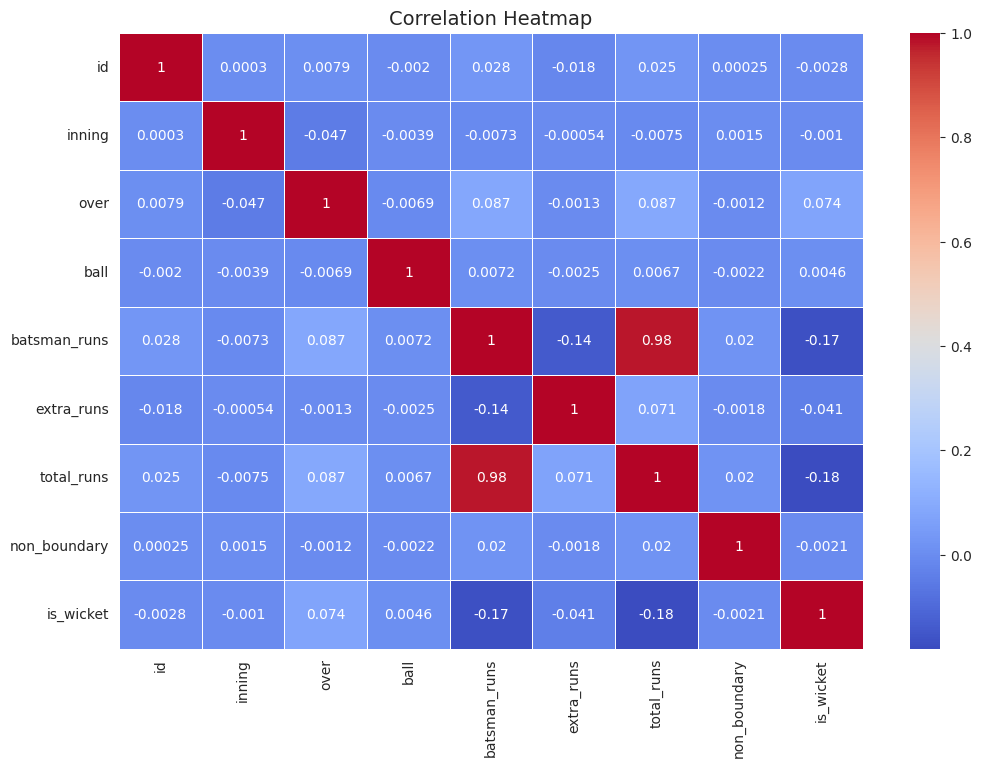

In [23]:
# Calculating the correlation matrix for numerical columns
correlation_matrix = ipl_data.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


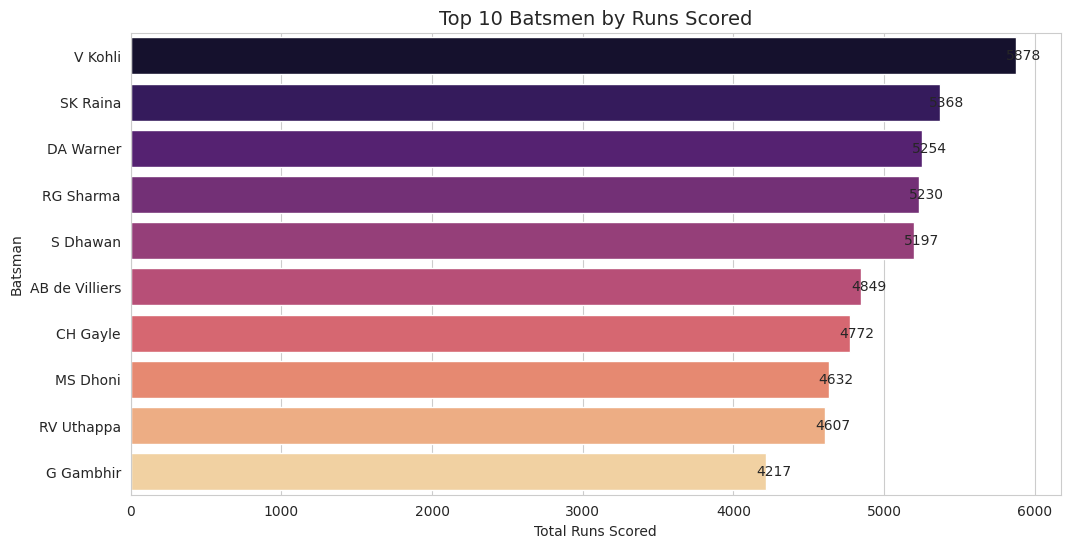

In [19]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the file path


# Reading the CSV file into a DataFrame


# Calculating the top 10 batsmen by total runs scored
top_10_batsmen = ipl_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).reset_index()

# Plotting the horizontal bar graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='batsman_runs', y='batsman', data=top_10_batsmen, palette='magma')
plt.title('Top 10 Batsmen by Runs Scored', fontsize=14)
plt.xlabel('Total Runs Scored')
plt.ylabel('Batsman')

# Adding data labels outside the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 50, p.get_y() + p.get_height() / 2., int(width), ha='center', va='center')

plt.show()


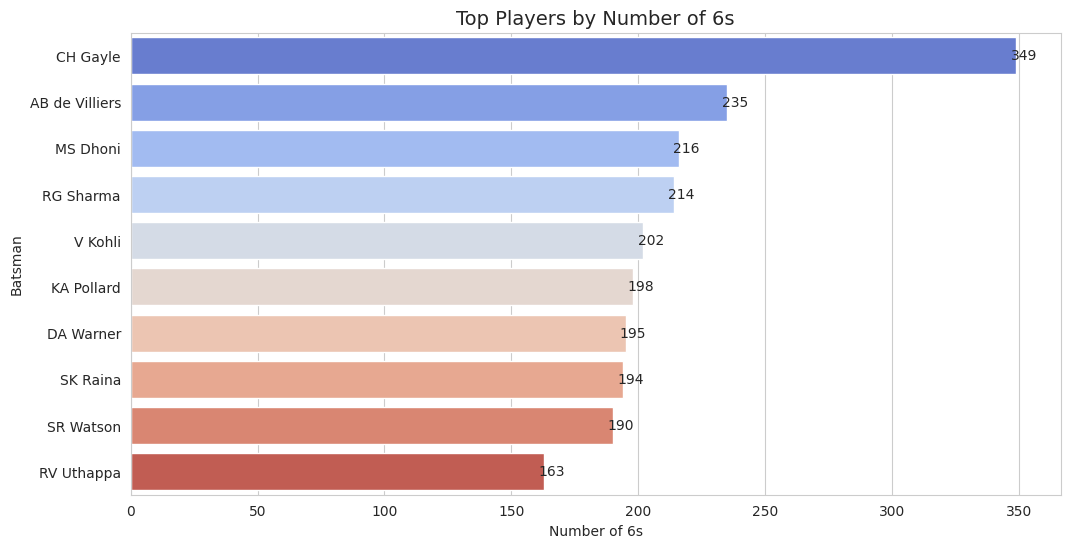

In [20]:
# Calculating the top players by number of 6s
top_10_sixes = ipl_data[ipl_data['batsman_runs'] == 6]['batsman'].value_counts().head(10).reset_index()
top_10_sixes.columns = ['Batsman', 'Number of 6s']

# Plotting the horizontal bar graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Number of 6s', y='Batsman', data=top_10_sixes, palette='coolwarm')
plt.title('Top Players by Number of 6s', fontsize=14)
plt.xlabel('Number of 6s')
plt.ylabel('Batsman')

# Adding data labels outside the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 3, p.get_y() + p.get_height() / 2., int(width), ha='center', va='center')

plt.show()


In [ ]:
# Calculating the top players by number of 4s
top_10_fours = ipl_data[ipl_data['batsman_runs'] == 4]['batsman'].value_counts().head(10).reset_index()
top_10_fours.columns = ['Batsman', 'Number of 4s']

# Plotting the horizontal bar graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Number of 4s', y='Batsman', data=top_10_fours, palette='cubehelix')
plt.title('Top Players by Number of 4s', fontsize=14)
plt.xlabel('Number of 4s')
plt.ylabel('Batsman')

# Adding data labels outside the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 3, p.get_y() + p.get_height() / 2., int(width), ha='center', va='center')

plt.show()


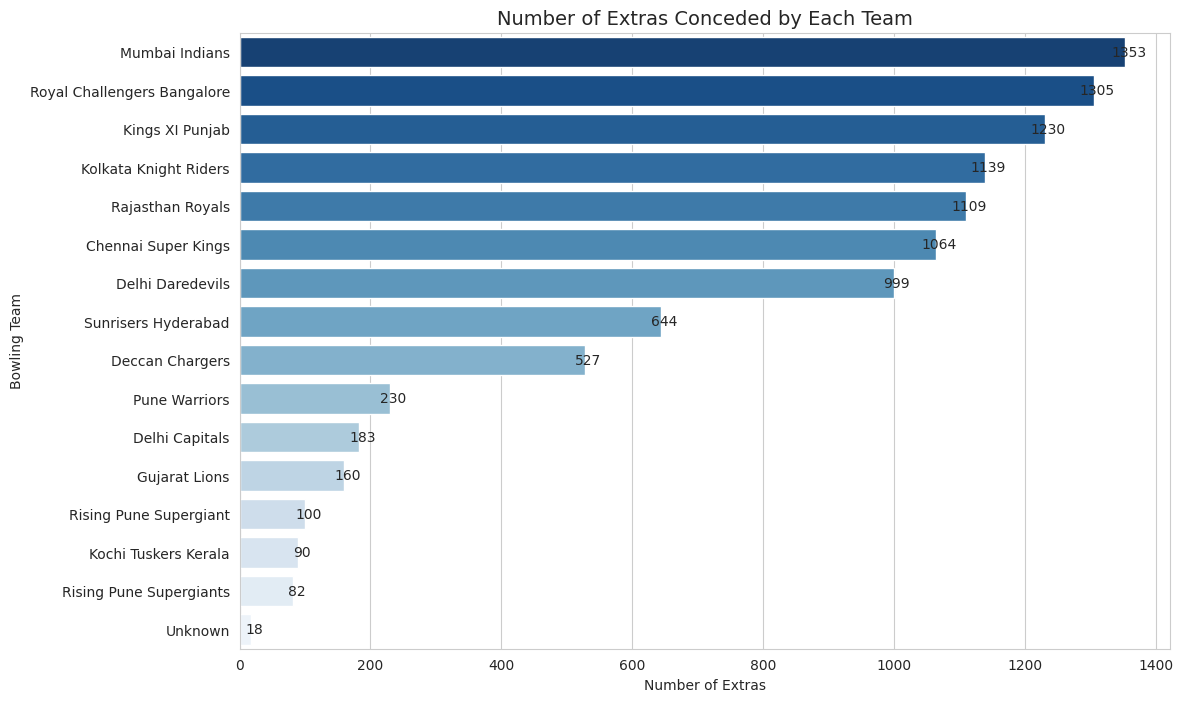

In [21]:
# Calculating the number of extras per bowling team
extras_per_team = ipl_data[ipl_data['extra_runs'] > 0]['bowling_team'].value_counts().reset_index()
extras_per_team.columns = ['Bowling Team', 'Number of Extras']

# Plotting the horizontal bar graph
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Number of Extras', y='Bowling Team', data=extras_per_team, palette='Blues_r')
plt.title('Number of Extras Conceded by Each Team', fontsize=14)
plt.xlabel('Number of Extras')
plt.ylabel('Bowling Team')

# Adding data labels outside the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2., int(width), ha='center', va='center')

plt.show()


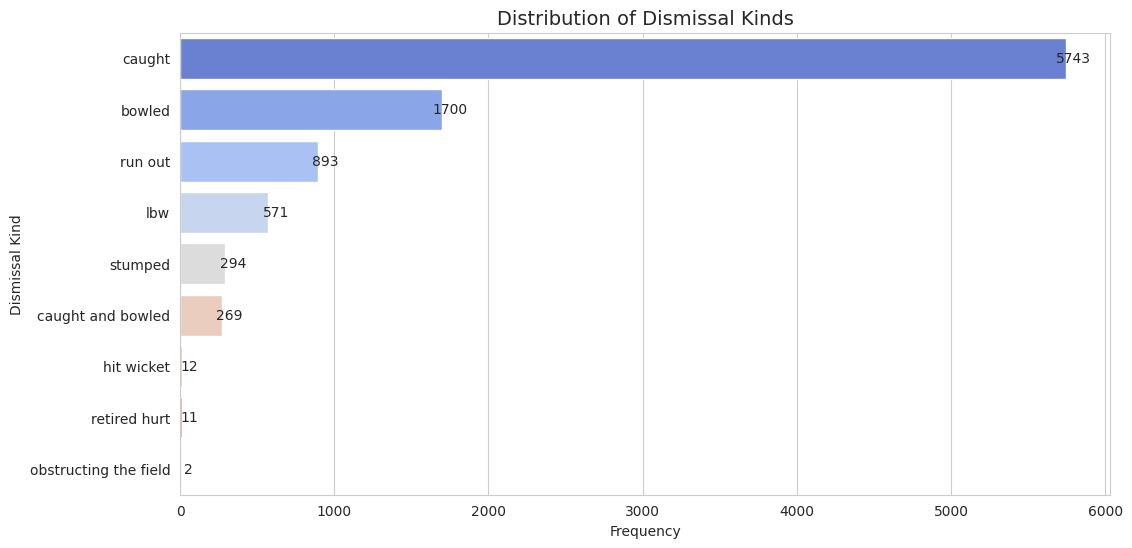

In [22]:
# Filtering the data to include only rows with dismissals
dismissals_data = ipl_data[ipl_data['dismissal_kind'].notnull()]

# Plotting the distribution of dismissal kinds
plt.figure(figsize=(12, 6))
sns.countplot(data=dismissals_data, y='dismissal_kind', order=dismissals_data['dismissal_kind'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Dismissal Kinds', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Dismissal Kind')

# Adding data labels
ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 50, p.get_y() + p.get_height() / 2., int(width), ha='center', va='center')

plt.show()


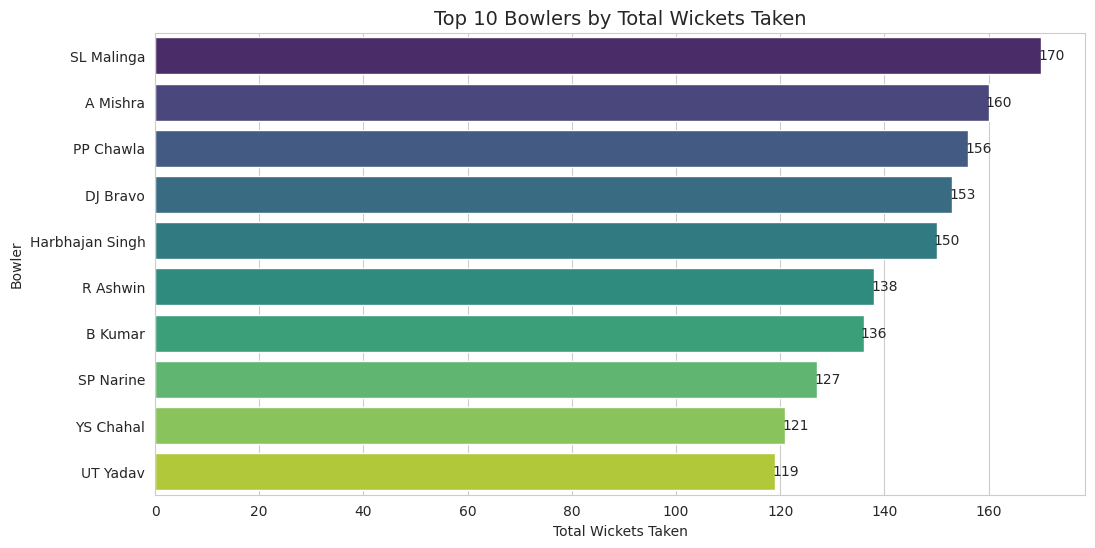

In [24]:
# Calculating the top 10 bowlers by total wickets taken (excluding run outs)
top_10_bowlers_wickets = ipl_data[ipl_data['dismissal_kind'].notnull() & (ipl_data['dismissal_kind'] != 'run out')]
top_10_bowlers_wickets = top_10_bowlers_wickets['bowler'].value_counts().head(10).reset_index()
top_10_bowlers_wickets.columns = ['Bowler', 'Total Wickets']

# Plotting the horizontal bar graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Total Wickets', y='Bowler', data=top_10_bowlers_wickets, palette='viridis')
plt.title('Top 10 Bowlers by Total Wickets Taken', fontsize=14)
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')

# Adding data labels outside the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 2, p.get_y() + p.get_height() / 2., int(width), ha='center', va='center')

plt.show()


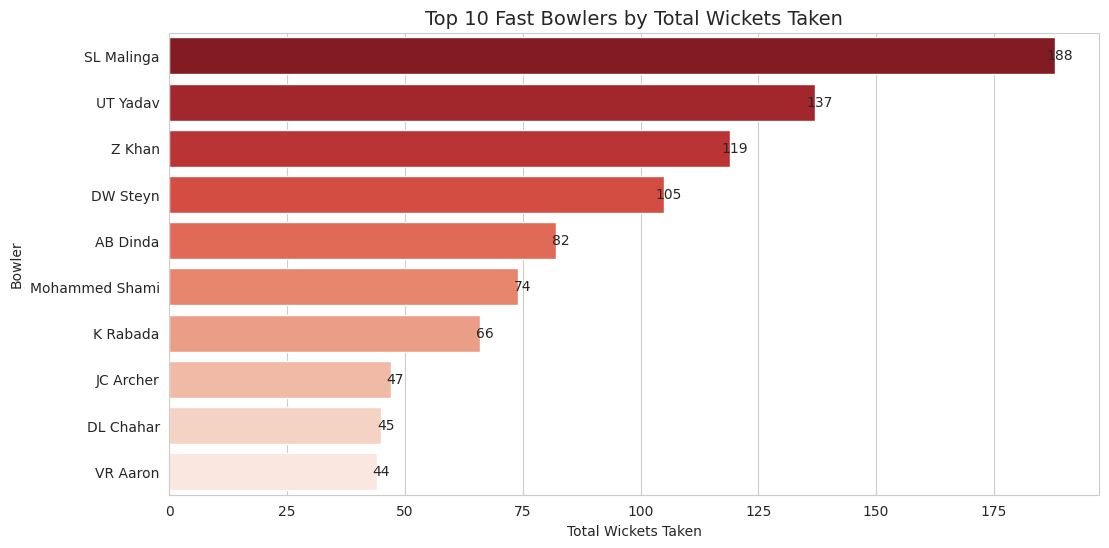

In [25]:
# Filtering data for fast bowlers
fast_bowlers_data = ipl_data[(ipl_data['dismissal_kind'].notnull()) & (ipl_data['Bowler master category'] == 'Fast')]
top_10_fast_bowlers = fast_bowlers_data['bowler'].value_counts().head(10).reset_index()
top_10_fast_bowlers.columns = ['Bowler', 'Total Wickets']

# Plotting the horizontal bar graph for fast bowlers
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Total Wickets', y='Bowler', data=top_10_fast_bowlers, palette='Reds_r')
plt.title('Top 10 Fast Bowlers by Total Wickets Taken', fontsize=14)
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')

# Adding data labels outside the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2., int(width), ha='center', va='center')

plt.show()
